In [2]:
import sympy
sympy.init_printing(use_latex=True)

from IPython.display import display, Math, Latex
disp_math = lambda str: display(Math(str))

# Finding Solutions of Differential Equation

In [ ]:
y,t,l,a,b = sympy.symbols("y t lambda a b")

to be solved:

In [ ]:
a,b,c = 1,3,2
eq0 = sympy.Eq(a*y(t).diff(t,2) + b*y(t).diff(t)+c*y(t),0)
eq0

guessing family of solution:

In [ ]:
eq1 = eq0.subs(y(t), sympy.exp(l*t))
eq1

differentiation:

In [ ]:
eq2 = eq1.doit()
eq2

solving for $\lambda$:

In [ ]:
sol = sympy.solve(eq2, l)
disp_math("y(t) \in \{e^{%dt}, e^{%dt}\}" % (sol[0],sol[1]))

### solving the initial value problem

$$v := \frac{dy}{dt}, y(0)=3, v(0)=-5$$

linear combination of solutions (and its derivative):

In [ ]:
y = (sympy.exp(l*t).subs(l,sol[0])*a 
        + sympy.exp(l*t).subs(l,sol[1])*b
    )
y

In [ ]:
v = y.diff(t)
v

solving the initial value problem:

In [ ]:
sol = sympy.solve([
        sympy.Eq(y.subs(t,0), 3),
        sympy.Eq(v.subs(t,0), -5)
    ], [a,b])
sol

In [ ]:
y.subs([(a, sol[a]), (b, sol[b])])

---
# Solving First-Order Differential Equation

In [98]:
x_0, y_0, t = sympy.symbols("x_0, y_0, t")
x = sympy.Function("x")(t)
y = sympy.Function("y")(t)

the system to be solved:

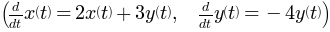

In [105]:
eq_dx = sympy.Eq(x.diff(t), 2*x + 3*y)
eq_dy = sympy.Eq(y.diff(t), -4*y)
eq_dx, eq_dy

solving:

In [106]:
sol = sympy.dsolve([
    eq_dx,
    eq_dy
])
sol

collecting the parameters:

In [107]:
symbols = list(sol[0].atoms(sympy.Symbol))
symbols

In [108]:
C_1, C_2 = symbols[2], symbols[0]

solving for a generalized initial condition:

In [109]:
sol2 = sympy.solve(
    [
        sympy.Eq(sol[0].subs(t,0).rhs, x_0),
        sympy.Eq(sol[1].subs(t,0).rhs, y_0)
    ],
    [C_1,C_2]
)
sol2

the full solution:

In [110]:
sol3 = [s.subs(sol2) for s in sol]
sol3